In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv('transaction_log.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 3 columns):
cust     6695 non-null int64
date     6695 non-null object
sales    6695 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.0+ KB


In [4]:
data.tail()

,cust,date,sales
6690,23556,1997-07-26,45.74
6691,23556,1997-09-27,31.47
6692,23556,1998-01-03,28.98
6693,23556,1998-06-07,28.98
6694,23569,1997-03-25,25.74


In [5]:
data.date = pd.to_datetime(data.date)
data = data.sort_values('date') # сортируем по дате

In [6]:
data.date.min(), data.date.max()

(Timestamp('1997-01-01 00:00:00'), Timestamp('1998-06-30 00:00:00'))

In [7]:
pd.unique(data.cust).shape

(2357,)

# Первый взгляд

Набор данных - датасет со сведениями о совершенных сделках. 

1. Содержит 6695 записей.
2. Без пропусков.
3. 3 столбца:
    * cust - id клиента, int
    * date - дата совершения платежа, timestamp
    * sales - величина платежа, int
4. Данные с 1.01.1997 по 30.06.1998 год (18 месяцев)
5. 2357 уникальных клиентов, клиенты фиксировались с 1.01.1997 по 25.03.1997

# Зависимости и распределения

In [8]:
data.sort_values('sales', ascending=False).head() 
# Подозрительный клиент, его MAX покупка существенно выше покупок др клиентов (да и др покупки входят в ТОП-3)

,cust,date,sales
5571,19339,1997-03-20,1554.58
5572,19339,1997-03-21,641.32
5569,19339,1997-03-18,621.84
4354,15003,1997-02-23,506.97
2734,9651,1997-02-18,493.91


In [9]:
data[data.cust==19339].sort_values('date') # Его покупки

,cust,date,sales
5563,19339,1997-03-09,260.39
5564,19339,1997-03-10,79.62
5565,19339,1997-03-11,363.51
5566,19339,1997-03-13,174.38
5567,19339,1997-03-15,188.56
5568,19339,1997-03-16,147.26
5569,19339,1997-03-18,621.84
5570,19339,1997-03-19,292.66
5571,19339,1997-03-20,1554.58
5572,19339,1997-03-21,641.32


In [10]:
# Клиент покупает часто и на хорошую сумму, но сделку удалю
# Спорный шаг

data = data.drop(index = 5571) 

C:\conda2020\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'fig.1')]

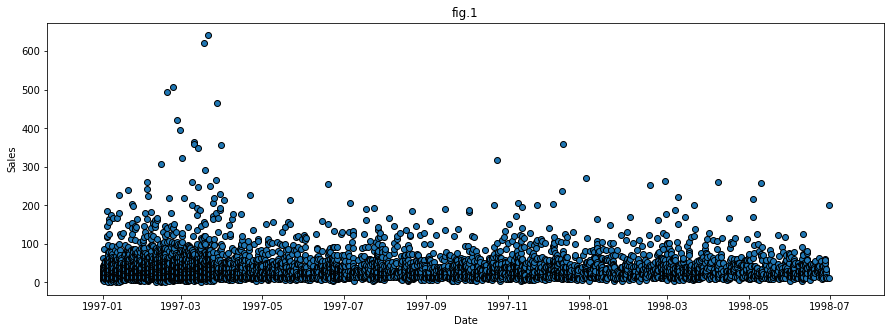

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(x = data.date.values ,y =data.sales, edgecolor='k') 
plt.xlabel('Date')
plt.ylabel('Sales')
ax.set(title='fig.1')

[Text(0.5, 1.0, 'fig.2')]

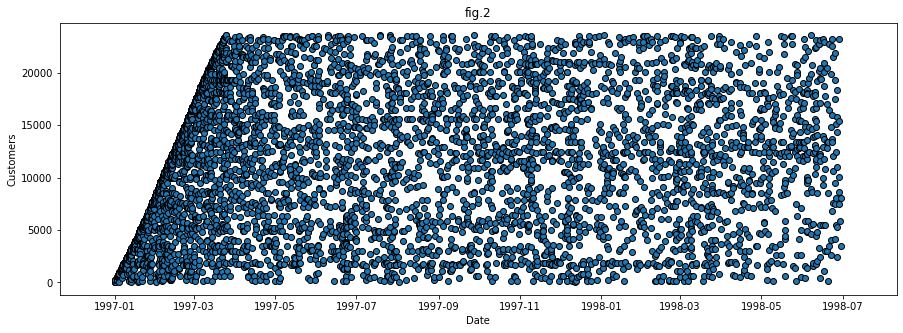

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(x = data.date.values ,y =data.cust, edgecolor='k') 
plt.xlabel('Date')
plt.ylabel('Customers')
ax.set(title='fig.2')

[Text(0.5, 1.0, 'fig.3')]

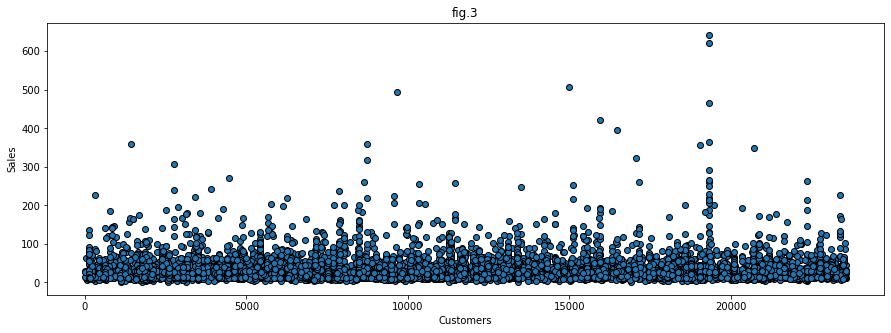

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(x = data.cust ,y =data.sales, edgecolor='k') 
plt.xlabel('Customers')
plt.ylabel('Sales')
ax.set(title='fig.3')

Text(0, 0.5, 'count')

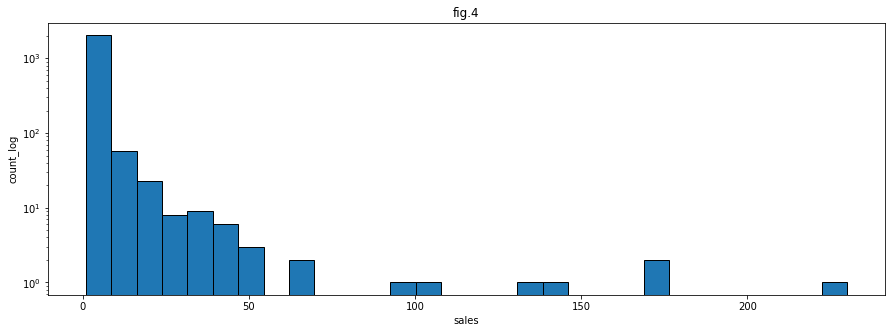

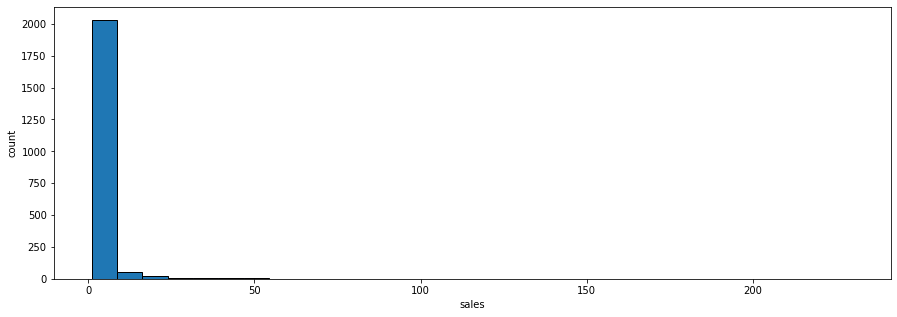

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = data.sales.value_counts().hist(bins=30, edgecolor='k')
plt.grid(False)
ax.set_yscale('log')
ax.set_xlabel('sales')
ax.set_ylabel('count_log')
ax.set(title='fig.4')
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = data.sales.value_counts().hist(bins=30, edgecolor='k')
plt.grid(False)
ax.set_xlabel('sales')
ax.set_ylabel('count')


1. Величина покупок остается на одном уровне на протяжении всего периода (fig.1)
2. Есть постоянные клиенты, делающие покупки регулярно на протяжении всего периода (gif.2)
3. В основном, платежи клиентов сосредоточены в категории "до 100 у.е." (fig.3, fig.4)

In [15]:
# Посмотрим зависимости во времени

data['month_name'] = data.date.apply(lambda x: x.month_name())
data['day_of_week_name'] = data.date.apply(lambda x: x.day_name())
data['month'] = data.date.apply(lambda x: x.month) # 1 - january
data['day_of_week'] = data.date.apply(lambda x: x.dayofweek) # 0 - monday
data['day'] = data.date.apply(lambda x: x.day)
data['year'] = data.date.apply(lambda x: x.year)

In [16]:
data.head()

,cust,date,sales,month_name,day_of_week_name,month,day_of_week,day,year
37,133,1997-01-01,18.99,January,Wednesday,1,2,1,1997
62,198,1997-01-01,15.76,January,Wednesday,1,2,1,1997
36,131,1997-01-01,30.32,January,Wednesday,1,2,1,1997
61,181,1997-01-01,43.70,January,Wednesday,1,2,1,1997
26,112,1997-01-01,11.77,January,Wednesday,1,2,1,1997


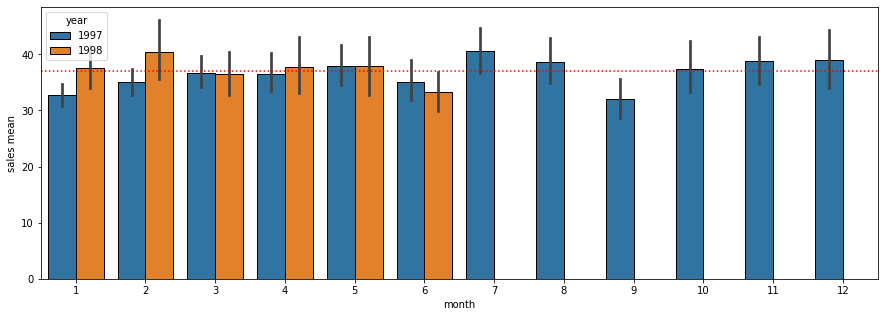

In [17]:
# По месяцам
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.barplot(y = 'sales', x = 'month', data=data, hue='year', ax=ax, edgecolor='k')
ax.set_ylabel('sales mean')
ax.axhline(37, color='r', linestyle=':')

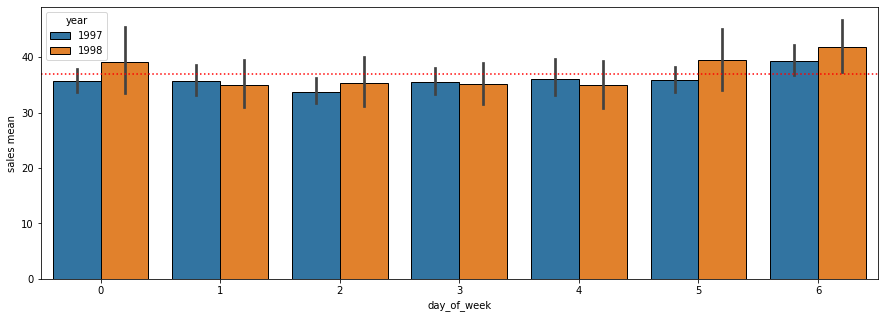

In [18]:
# По дням недели
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.barplot(y = 'sales', x = 'day_of_week', data=data, hue = 'year', ax=ax, edgecolor='k')
ax.set_ylabel('sales mean')
ax.axhline(37, linestyle=':', color='red')

1. Месяцы 7, 8, 10, 11, 12 (летние и предновогодние)
2. Видим что средний чек в ВС превышает остальыне чеки

# RFM

In [19]:
RFM = pd.DataFrame()
RFM['cust'] = data.cust.unique() # Список уникальных клиентов
RFM = RFM.merge(data.groupby('cust')['cust','date'].tail(1),
                left_on=['cust'], right_on=['cust']) # добавить дату последней покупки


# recency
maxdate = data.date.max()
RFM['recency'] = RFM.date.apply(lambda x: (maxdate - x).days)

# frequency
frequency = data.groupby('cust').apply(lambda x: x.shape[0]).rename('frequency') 
RFM = RFM.merge(pd.DataFrame(frequency),
                left_on=['cust'], right_on=['cust']) 

# monetary
monetary = data.groupby('cust')['sales'].sum().rename('monetary')
RFM = RFM.merge(pd.DataFrame(monetary),
                left_on=['cust'], right_on=['cust']) 

# Ср время между покупками
def func(a):
    return (a.date.iloc[-1] - a.date.iloc[0]).days / a.date.shape[0]

av_time = data.groupby('cust').apply(func).rename('average_time')
monetary = data.groupby('cust')['sales'].sum().rename('monetary')
RFM = RFM.merge(pd.DataFrame(av_time),
                left_on=['cust'], right_on=['cust'])

RFM.head(5)

,cust,date,recency,frequency,monetary,average_time
0,133,1997-11-11,231,7,199.17,44.857143
1,198,1997-01-01,545,1,15.76,0.000000
2,131,1997-01-01,545,1,30.32,0.000000
3,181,1997-01-01,545,1,43.70,0.000000
4,112,1997-02-05,510,2,23.54,17.500000


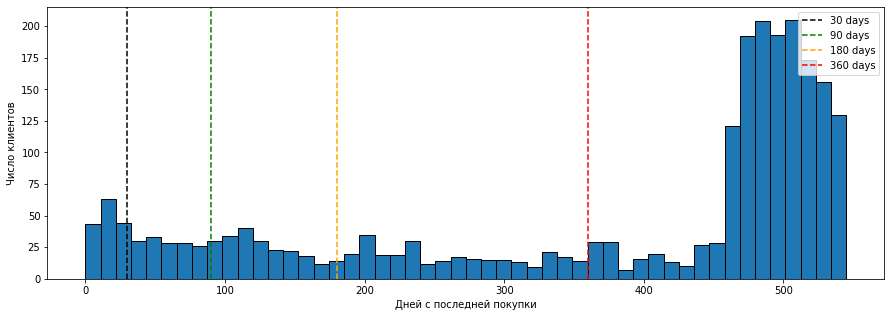

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = RFM.recency.hist(bins = 50, edgecolor='k')
plt.grid(False)
ax.axvline(30, color='k', linestyle='--', label='30 days')
ax.axvline(90, color='green', linestyle='--', label='90 days')
ax.axvline(180, color='orange', linestyle='--', label='180 days')
ax.axvline(360, color='red', linestyle='--', label='360 days')
ax.set_xlabel('Дней с последней покупки')
ax.set_ylabel('Число клиентов')
plt.legend(loc=1)

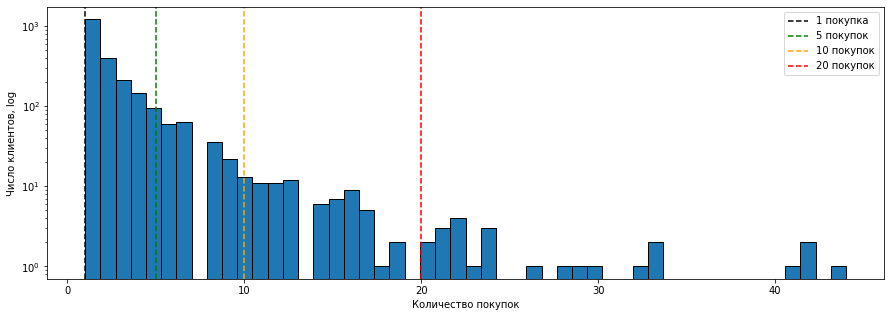

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = RFM.frequency.hist(bins = 50, edgecolor='k')
plt.grid(False)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.axvline(1, color='k', linestyle='--', label='1 покупка')
ax.axvline(5, color='green', linestyle='--', label='5 покупок')
ax.axvline(10, color='orange', linestyle='--', label='10 покупок')
ax.axvline(20, color='red', linestyle='--', label='20 покупок')
ax.set_xlabel('Количество покупок')
ax.set_ylabel('Число клиентов, log')
plt.legend(loc=1)

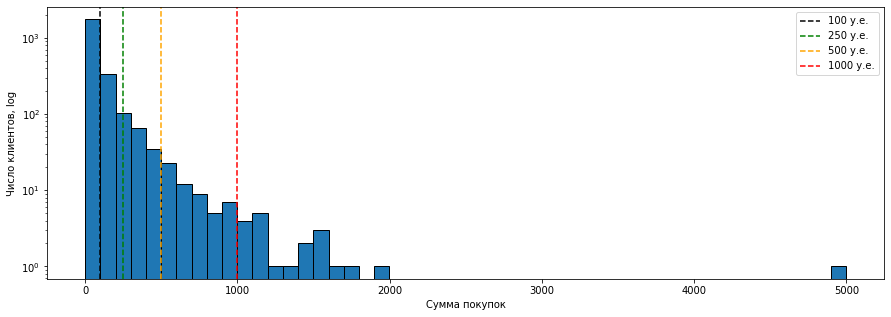

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = RFM.monetary.hist(bins = 50, edgecolor='k')
plt.grid(False)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.axvline(100, color='k', linestyle='--', label='100 у.е.')
ax.axvline(250, color='green', linestyle='--', label='250 у.е.')
ax.axvline(500, color='orange', linestyle='--', label='500 у.е.')
ax.axvline(1000, color='red', linestyle='--', label='1000 у.е.')
ax.set_xlabel('Сумма покупок')
ax.set_ylabel('Число клиентов, log')
plt.legend(loc=1)

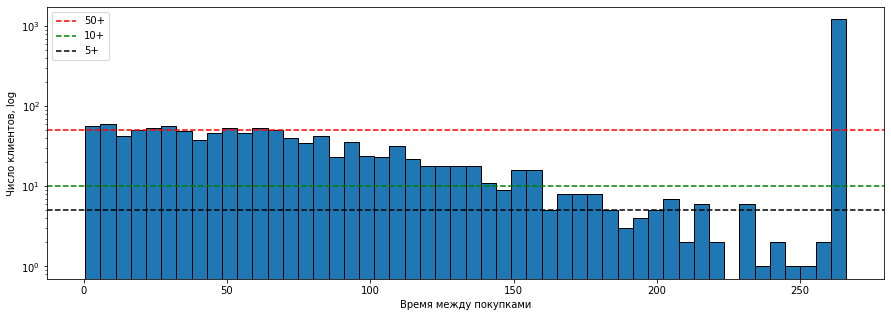

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

# т.к. совершившие 1 покупку имеют 0, убираем их в конец распределения (ф-я apply)
ax = RFM.average_time.apply(lambda x: RFM.average_time.max() if x == 0 else x).hist(bins = 50, edgecolor='k')

plt.grid(False)
ax.set_yscale('log')
ax.axhline(50, color='red', linestyle='--', label='50+')
ax.axhline(10, color='green', linestyle='--', label='10+')
ax.axhline(5, color='k', linestyle='--', label='5+')
ax.set_xlabel('Время между покупками')
ax.set_ylabel('Число клиентов, log')
ax.legend()

In [24]:
# Вычисляем перекрестные метрики

In [25]:
def compute_score(x, thresholds):
    '''
    Input:
        x - число, int or float
        thresholds - массив с порогами длины 4, tuple or list
         - задаем от лучше к хуже
    Output:
        int
    '''
    
    t1, t2, t3, t4 = thresholds
    if x <= t1: 
        return 1
    elif (x > t1) and (x <= t2):
        return 2
    elif (x > t2) and (x <= t3):
        return 3
    elif (x > t3) and (x <= t4):
        return 4
    elif x > t4:
        return 5

def compute_score_r(x, thresholds): # отдельная функция для recency
    t1, t2, t3, t4 = thresholds
    if x > t4: 
        return 1
    elif (x < t4) and (x >= t3):
        return 2
    elif (x < t3) and (x >= t2):
        return 3
    elif (x < t2) and (x >= t1):
        return 4
    elif x < t1:
        return 5

КЛАССИФИКАЦИЯ КЛИЕНТОВ:
 * **Относительно давности покупки (recency)**
  * 5 - лучше всех
  * 4 -
  * 3 - 
  * 2 -
  * 1 - хуже всех
 * **Относительно числа покупок (frequency)**
  * 5 -
  * 4 -
  * 3 - 
  * 2 -
  * 1 -
 * **Относительно суммы за все покупки (monetary)**
  * 5 -
  * 4 - 
  * 3 - 
  * 2 - 
  * 1 -

In [35]:
thresholds_mon = (100, 250, 500, 1000) # Точки для сегментации
thresholds_freq = (1, 5, 10, 20)
thresholds_rec = (30, 90, 180, 360)

RFM['R'] = RFM.recency.apply(lambda x: compute_score_r(x, thresholds_rec))
RFM['F'] = RFM.frequency.apply(lambda x: compute_score(x, thresholds_freq))
RFM['M'] = RFM.monetary.apply(lambda x: compute_score(x, thresholds_mon))
RFM['RFM'] = RFM[['R','F','M']].sum(axis=1)

RFM.head()

,cust,date,recency,frequency,monetary,average_time,R,F,M,RFM
0,133,1997-11-11,231,7,199.17,44.857143,2.0,3,2,7.0
1,198,1997-01-01,545,1,15.76,0.000000,1.0,1,1,3.0
2,131,1997-01-01,545,1,30.32,0.000000,1.0,1,1,3.0
3,181,1997-01-01,545,1,43.70,0.000000,1.0,1,1,3.0
4,112,1997-02-05,510,2,23.54,17.500000,1.0,2,1,4.0


Text(0, 0.5, 'Число клиентов')

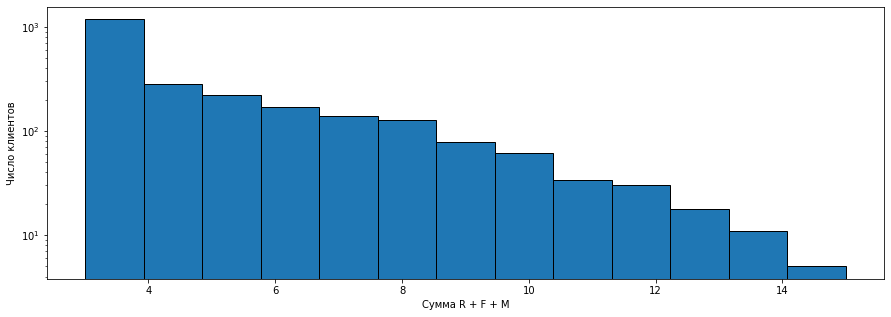

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = RFM[['R', 'F', 'M']].sum(axis=1).hist(bins=13, edgecolor='k')
plt.grid(False)
ax.set_yscale('log')
ax.set_xlabel('Сумма R + F + M')
ax.set_ylabel('Число клиентов')

Наилучшие клиенты имеют мумму R+F+M >= 12, таких меньшинство

In [28]:
def show(name1, name2, data, ax=None):
    # name1 - OY
    # name2 - OX
    m = np.zeros(shape=(5,5))
    _ = data
    for row in range(4, -1, -1):
        for col in range(0,5):
            m[ 4 - row, col] = _[(_[name1] == row+1) &( _[name2] == col+1)].shape[0]# = i
    #return m
    ax = sns.heatmap(m, annot=True, cmap='RdBu_r', fmt='.0f', lw=1, ax=ax)
    ax.set_xticklabels([1,2,3,4,5])
    ax.set_yticklabels([5,4,3,2,1])
    ax.set_xlabel(name2)
    ax.set_ylabel(name1)
    return ax

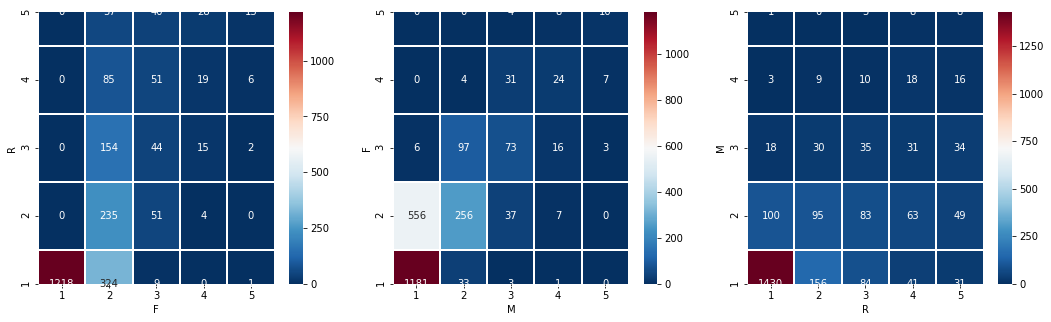

In [29]:
# косячное изображение в новой версией seaborn

fig, ax = plt.subplots(1,3, figsize=(18,5))
show('R', 'F', RFM, ax=ax[0])
show('F', 'M', RFM, ax=ax[1])
show('M', 'R', RFM, ax=ax[2])

[Text(0.5, 1.0, 'Fig.3')]

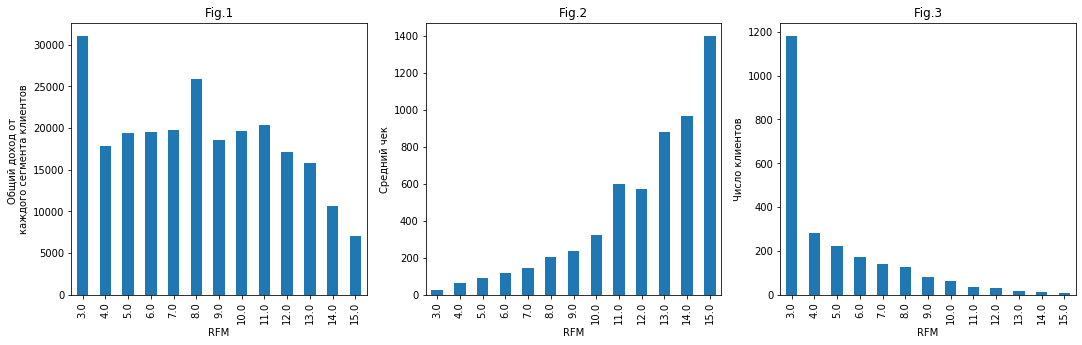

In [48]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
RFM.groupby('RFM')['monetary'].sum().plot.bar(ax=ax[0])
ax[0].set_xlabel('RFM')
ax[0].set_ylabel('Общий доход от \nкаждого сегмента клиентов')
ax[0].set(title='Fig.1')


RFM.groupby('RFM')['monetary'].mean().plot.bar(ax=ax[1])
ax[1].set_xlabel('RFM')
ax[1].set_ylabel('Средний чек')
ax[1].set(title='Fig.2')

RFM.groupby('RFM').F.count().plot.bar(ax=ax[2])
ax[2].set_xlabel('RFM')
ax[2].set_ylabel('Число клиентов')
ax[2].set(title='Fig.3')


**По графику воводы:**
1. Видно что клиенты с суммой RFM =11 дают примерно тот же доход что и клиенты с RFM= 5-7, при том, что их в разы меньше